# 北京PM2.5相关性分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/Users/hjteng/anaconda3/envs/TensorFlow/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### 加载原始数据

In [91]:
dataset = pd.read_csv('./dataset/beijing.csv')
dataset.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


No: row number   
year: year of data in this row   
month: month of data in this row   
day: day of data in this row   
hour: hour of data in this row   
pm2.5: PM2.5 concentration (ug/m^3)   
DEWP: Dew Point (â„ƒ)   
TEMP: Temperature (â„ƒ)   
PRES: Pressure (hPa)   
cbwd: Combined wind direction   
Iws: Cumulated wind speed (m/s)   
Is: Cumulated hours of snow   
Ir: Cumulated hours of rain 

#### 数据清洗

In [227]:
dataset = pd.read_csv('./dataset/beijing.csv',header=0,parse_dates=[[1,2,3,4]],index_col=0,
                      date_parser=lambda date: pd.datetime.strptime(date,'%Y %m %d %H'))
dataset.drop('No',axis=1,inplace=True)
dataset.index.name='date'
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [228]:
pd.isnull(dataset).any()

pollution     True
dew          False
temp         False
press        False
wnd_dir      False
wnd_spd      False
snow         False
rain         False
dtype: bool

In [230]:
#缺失数据用平均值填充
dataset=dataset.fillna(dataset.mean()['pollution'],axis=1)

In [233]:
dataset.wnd_dir.unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [234]:
dataset.wnd_dir=dataset.wnd_dir.map({'NW':0,'cv':1,'NE':2,'SE':3})

#### 保存数据清洗结果

In [235]:
dataset.to_csv('./dataset/beijing_pm25.csv')

## 加载数据

In [2]:
data_set = pd.read_csv('./dataset/beijing_pm25.csv')
series = data_set.iloc[:,1]
series_values=series.values.astype('float32')

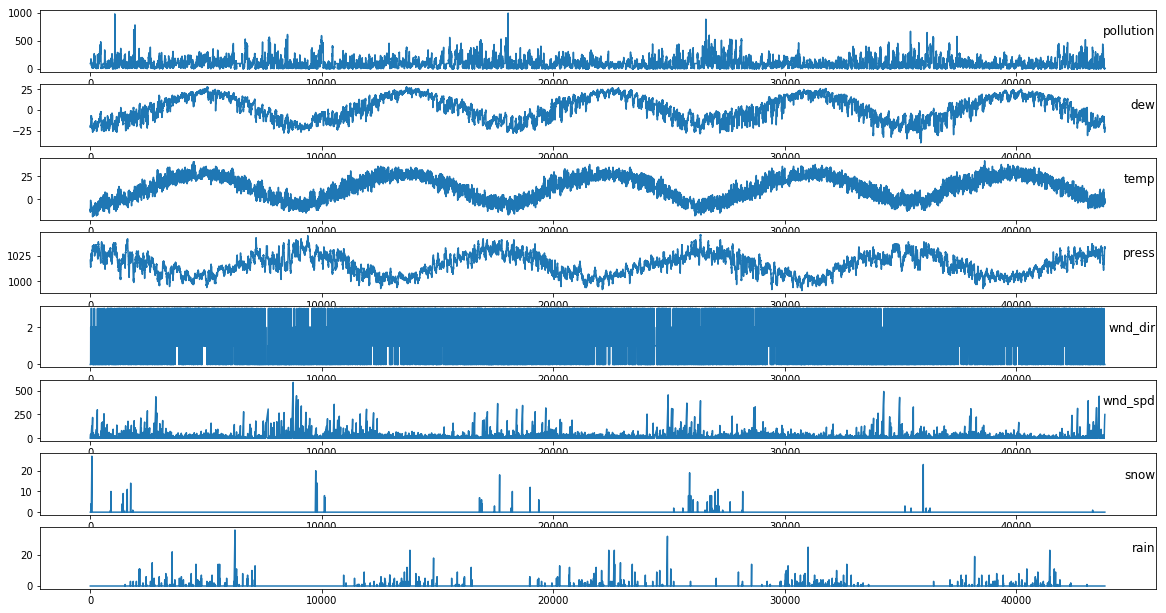

In [3]:
plt.figure(figsize=(20,12))
for i in range(1,data_set.shape[1]):
    plt.subplot(data_set.shape[1],1,i+1)
    plt.plot(data_set.values[:,i])
    plt.title(data_set.columns[i],y=0.5,loc='right')
plt.show()

### 相关性分析

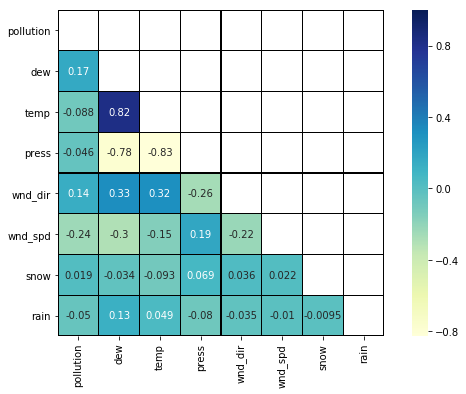

In [4]:
corr_all = data_set.drop('date', axis = 1).corr()

mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(corr_all,mask = mask,linewidths=0.25,vmax=1.0, square=True, 
            cmap="YlGnBu", linecolor='black', annot=True)
plt.savefig('./Correlation_Analysis.pdf')
plt.show()

对于pm2.5来说没有看到比较强的相关指标  
可以看到露水和温度呈现正相关特征  
气压和露水呈现负相关特征  
气压和温度呈现负相关特征